In [13]:
import numpy as np
from scipy.optimize import linprog

# Цільова функція (коефіцієнти перед x1, x2, x3 у максимізації)
c = [-2, -9, -6]

# Ліва частина обмежень (матриця коефіцієнтів перед x1, x2, x3)
A = np.array([
    [12, 6, 2],    # Дизайнери
    [12, 24, 18],  # Розробники
    [12, 18, 12]   # Тестувальники
])

# Права частина обмежень (вектор правих частин)
b = np.array([320, 192, 180])

# Границі (bounds) для x1, x2, x3 (можуть бути від 0 до нескінченності)
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)

# Розв'язання задачі лінійного програмування
res = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds, x3_bounds], method='highs')

# Вивід результатів
print("Оптимальна кількість послуг:")
print(f"Сайти: {round(res.x[0], 2)}")
print(f"Інтернет-магазини: {round(res.x[1], 2)}")
print(f"Інтеграції з ERP: {round(res.x[2], 2)}")

# Обчислення максимального доходу
max_profit = -res.fun  # res.fun мінус, бо linprog мінімізує, а ми максимізуємо
print(f"\nМаксимальний дохід: {round(max_profit, 2)} тис. $")


Оптимальна кількість послуг:
Сайти: 0.0
Інтернет-магазини: 8.0
Інтеграції з ERP: 0.0

Максимальний дохід: 72.0 тис. $


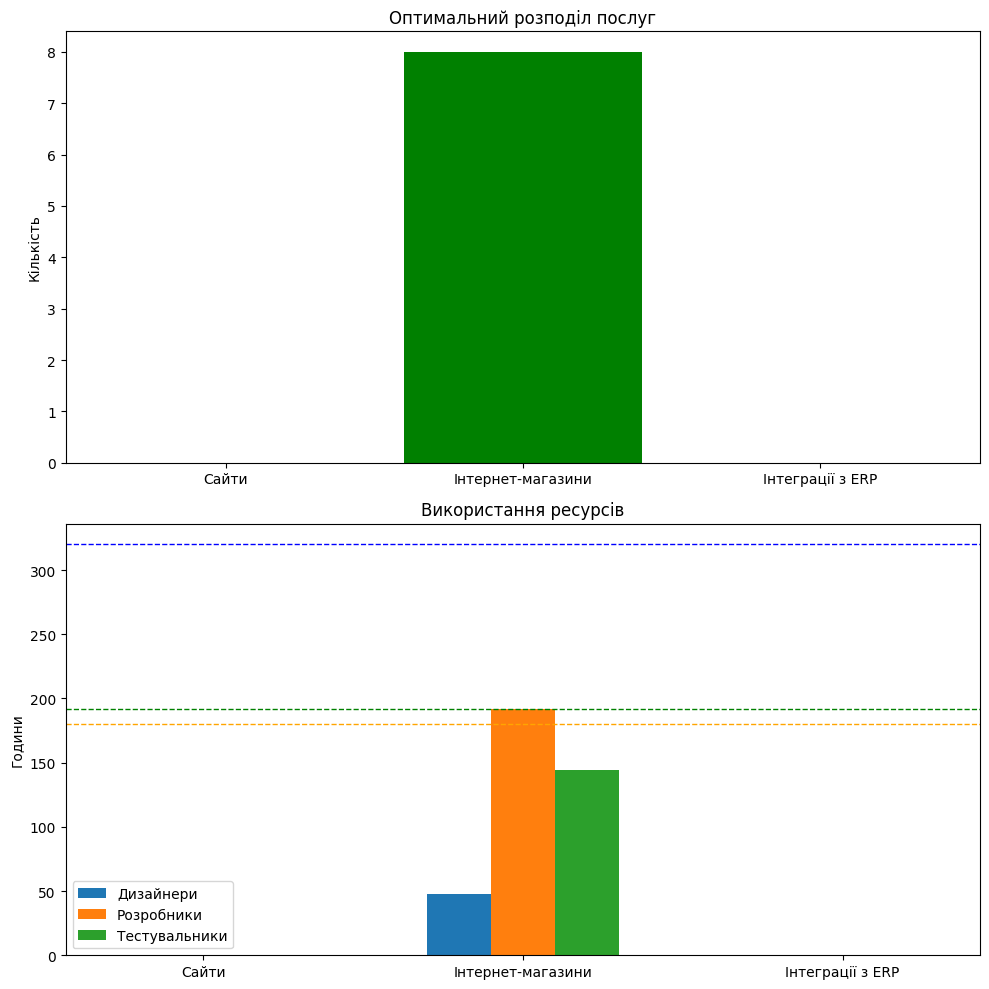

In [22]:
import matplotlib.pyplot as plt

# Дані для графіків
services = ['Сайти', 'Інтернет-магазини', 'Інтеграції з ERP']
quantities = [x1, x2, x3]

# Використання ресурсів
designers_hours = [12 * x1, 6 * x2, 2 * x3]
developers_hours = [12 * x1, 24 * x2, 18 * x3]
testers_hours = [12 * x1, 18 * x2, 12 * x3]

# Загальні обмеження
total_designers_hours = 320
total_developers_hours = 192
total_testers_hours = 180

# Параметри графіка
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Графік кількості послуг
ax[0].bar(services, quantities, color=['blue', 'green', 'orange'])
ax[0].set_title('Оптимальний розподіл послуг')
ax[0].set_ylabel('Кількість')

# Графік використання ресурсів
bar_width = 0.2
index = np.arange(len(services))

bar1 = ax[1].bar(index, designers_hours, bar_width, label='Дизайнери')
bar2 = ax[1].bar(index + bar_width, developers_hours, bar_width, label='Розробники')
bar3 = ax[1].bar(index + 2 * bar_width, testers_hours, bar_width, label='Тестувальники')

ax[1].axhline(y=total_designers_hours, color='blue', linestyle='--', linewidth=1)
ax[1].axhline(y=total_developers_hours, color='green', linestyle='--', linewidth=1)
ax[1].axhline(y=total_testers_hours, color='orange', linestyle='--', linewidth=1)

ax[1].set_title('Використання ресурсів')
ax[1].set_ylabel('Години')
ax[1].set_xticks(index + bar_width)
ax[1].set_xticklabels(services)
ax[1].legend()

plt.tight_layout()
plt.show()


## Висновок
Компанія має обмежену кількість ресурсів (часу) для кожного типу спеціалістів. Інтернет-магазини приносять найбільший прибуток на одиницю витраченого часу, особливо для розробників, у яких найсуворіше обмеження. Тому оптимальним рішенням є створення 8 інтернет-магазинів, і не витрачати ресурси на сайти або інтеграції з ERP, які приносять менший прибуток на одиницю витраченого часу.

Оптимальна кількість сайтів за місяць: 15.0
Оптимальна кількість інтернет-магазинів за місяць: 8.0
Оптимальна кількість інтеграцій за місяць: 10.666666666666666


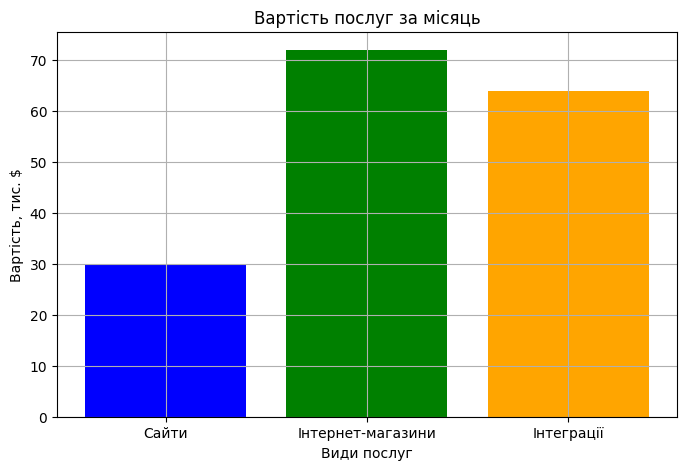

In [37]:
# Цільові функції для кожного виду послуг: сайти, інтернет-магазини, інтеграції
c_site = [-2, 0, 0]   # Коефіцієнти для сайтів (x1)
c_store = [0, -9, 0]  # Коефіцієнти для інтернет-магазинів (x2)
c_integration = [0, 0, -6]  # Коефіцієнти для інтеграцій (x3)

# Функція для знаходження оптимального розподілу
def find_optimal_solution(c):
    res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds)
    return res.x

# Знаходження оптимальних рішень для кожного виду послуг
x1_opt = find_optimal_solution(c_site)[0]
x2_opt = find_optimal_solution(c_store)[1]
x3_opt = find_optimal_solution(c_integration)[2]

# Вивід результатів
print(f"Оптимальна кількість сайтів за місяць: {x1_opt}")
print(f"Оптимальна кількість інтернет-магазинів за місяць: {x2_opt}")
print(f"Оптимальна кількість інтеграцій за місяць: {x3_opt}")

# Вартість кожного виду послуг за місяць
cost_site = 2 * x1_opt
cost_store = 9 * x2_opt
cost_integration = 6 * x3_opt

# Побудова графіку
categories = ['Сайти', 'Інтернет-магазини', 'Інтеграції']
costs = [cost_site, cost_store, cost_integration]

plt.figure(figsize=(8, 5))
plt.bar(categories, costs, color=['blue', 'green', 'orange'])
plt.title('Вартість послуг за місяць')
plt.xlabel('Види послуг')
plt.ylabel('Вартість, тис. $')
plt.grid(True)
plt.show()
